<a href="https://colab.research.google.com/github/sezaionurlu/Transaction-Volume-Forecast---Iyzico/blob/main/Iyzico_%C4%B0%C5%9Flem_Hacmi_Tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**İş Problemi**

Iyzico internetten alışveriş deneyimini hem alıcılar hem de satıcılar için
kolaylaştıran bir finansal teknolojiler şirketidir. E-ticaret firmaları, pazaryerleri
ve bireysel kullanıcılar için ödeme altyapısı sağlamaktadır. 2021 yılının ilk 3
ayı için merchant_id ve gün bazında toplam işlem hacmi tahmini yapılması
beklenmekte.

**Veri Seti Hikayesi**

7 üye iş yerinin 2018’den 2021’e kadar olan verileri yer almaktadır.

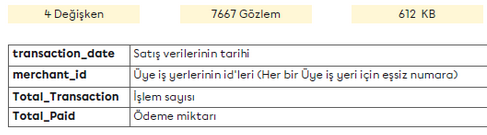

**Görev 1:** Veri Setinin Keşfi

In [ ]:
!pip install lightgbm

import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import lightgbm as lgb
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Adım 1:** Iyzico_data.csv dosyasını okutunuz. transaction_date değişkeninin tipini date'e çeviriniz.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/Ödevler/11/iyzico_data.csv',parse_dates=['transaction_date'])

In [ ]:
df = df.iloc[:, 1:]
df.head()

,transaction_date,merchant_id,Total_Transaction,Total_Paid
0,2018-01-01,535,349,25883.226
1,2018-01-01,42616,141,40918.860
2,2018-01-01,46774,410,306902.700
3,2018-01-01,86302,10,11.340
4,2018-01-01,124381,285,111383.766


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667 entries, 0 to 7666
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_date   7667 non-null   datetime64[ns]
 1   merchant_id        7667 non-null   int64         
 2   Total_Transaction  7667 non-null   int64         
 3   Total_Paid         7667 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 239.7 KB


**Adım 2:** Veri setinin başlangıc ve bitiş tarihleri nedir?

In [ ]:
df['transaction_date'].min(), df['transaction_date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00'))

**Adım 3:** Her üye iş yerindeki toplam işlem sayısı kaçtır?

In [ ]:
df.groupby('merchant_id')['Total_Transaction'].sum()

merchant_id
535       1302725
42616     1126191
46774     1599559
57192     1146440
86302      840951
124381    1935357
129316     440029
Name: Total_Transaction, dtype: int64

**Adım 4:** Her üye iş yerindeki toplam ödeme miktarı kaçtır?

In [ ]:
df.groupby('merchant_id')['Total_Paid'].sum()

merchant_id
535       1.566015e+08
42616     3.545831e+08
46774     1.567200e+09
57192     3.173371e+08
86302     2.870447e+06
124381    1.158693e+09
129316    1.555471e+06
Name: Total_Paid, dtype: float64

**Adım 5:** Her üye iş yerininin her bir yıl içerisindeki transaction count grafiklerini gözlemleyiniz.

In [ ]:
df['year'] = df['transaction_date'].dt.year

In [ ]:
df.groupby(['merchant_id','year'])['Total_Transaction'].sum()

merchant_id  year
535          2018     273402
             2019     434672
             2020     594651
42616        2018     189402
             2019     318784
             2020     618005
46774        2018     410259
             2019     535471
             2020     653829
57192        2018     324180
             2019     379923
             2020     442337
86302        2018      38923
             2019      51842
             2020     750186
124381       2018     170631
             2019     320002
             2020    1444724
129316       2018     112171
             2019     144886
             2020     182972
Name: Total_Transaction, dtype: int64

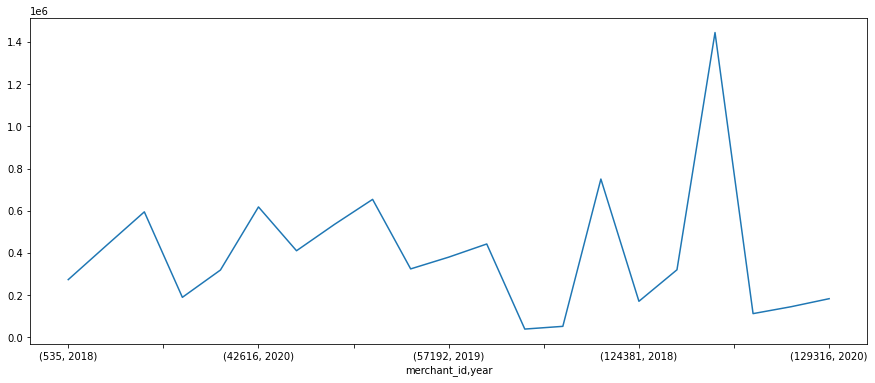

In [ ]:
df.groupby(['merchant_id','year'])['Total_Transaction'].sum().plot(figsize=(15, 6))
plt.show()

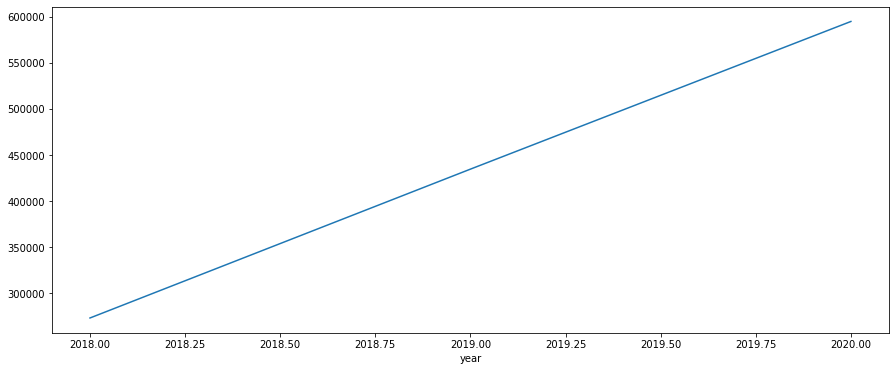

In [ ]:
df[df['merchant_id'] == 535].groupby('year')['Total_Transaction'].sum().plot(figsize=(15, 6))
plt.show()

In [ ]:
df[df['merchant_id'] == 535].groupby('year')['Total_Transaction'].sum().plot(figsize=(15, 6))
plt.show()

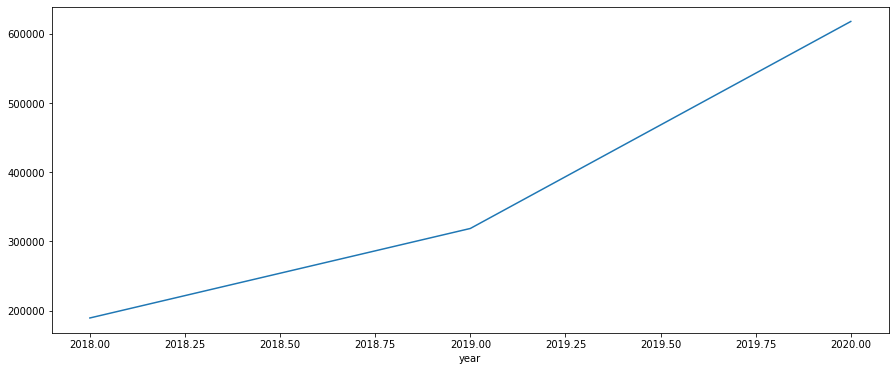

In [ ]:
df[df['merchant_id'] == 42616].groupby('year')['Total_Transaction'].sum().plot(figsize=(15, 6))
plt.show()

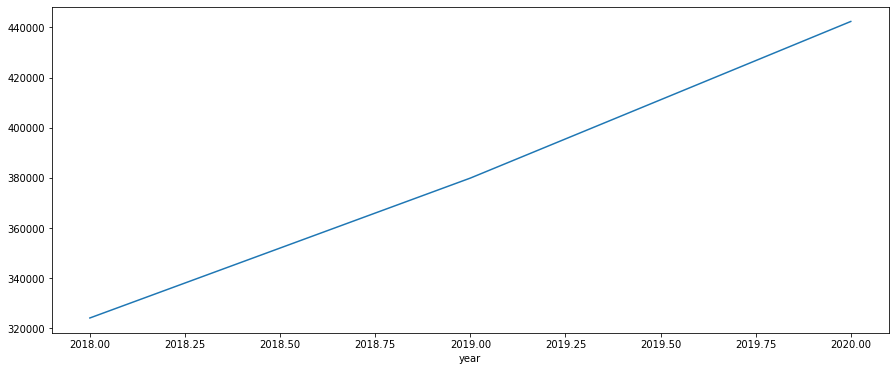

In [ ]:
df[df['merchant_id'] == 57192].groupby('year')['Total_Transaction'].sum().plot(figsize=(15, 6))
plt.show()

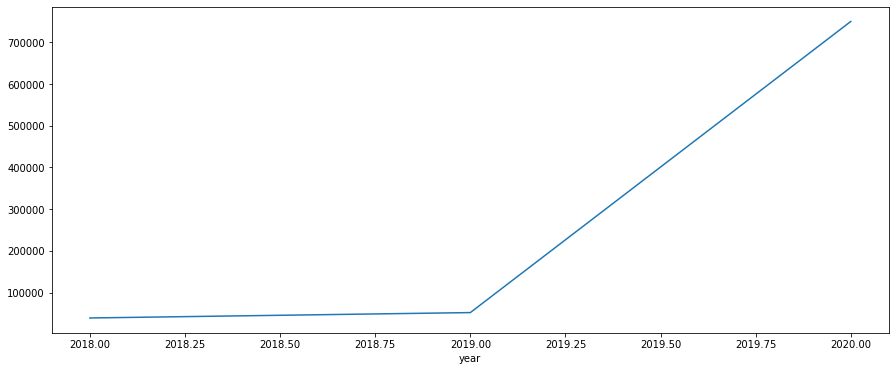

In [ ]:
df[df['merchant_id'] == 86302].groupby('year')['Total_Transaction'].sum().plot(figsize=(15, 6))
plt.show()

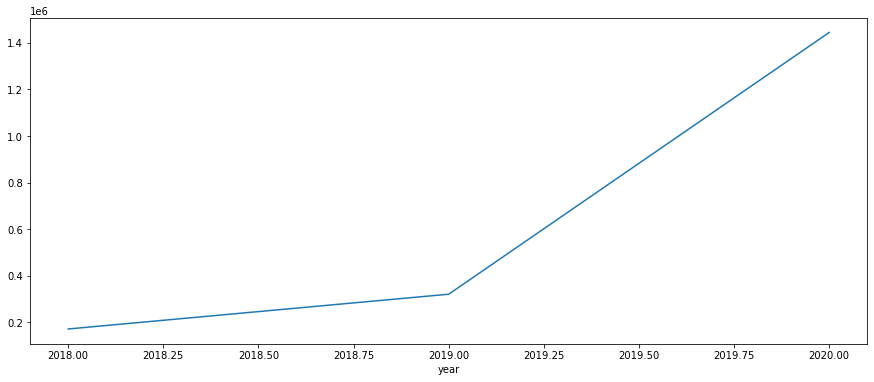

In [ ]:
df[df['merchant_id'] == 124381].groupby('year')['Total_Transaction'].sum().plot(figsize=(15, 6))
plt.show()

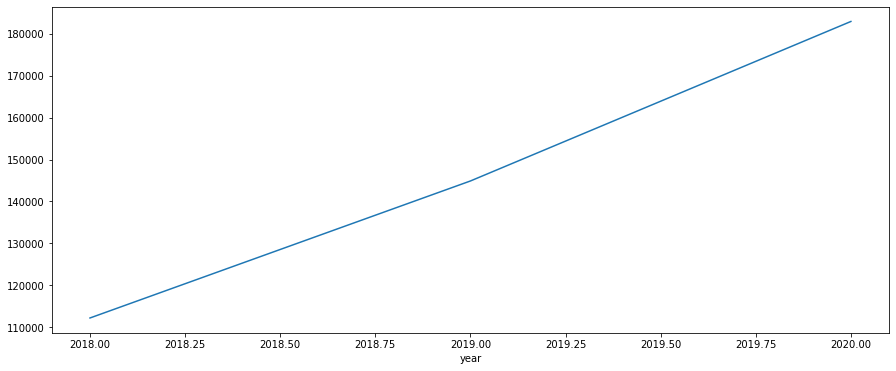

In [ ]:
df[df['merchant_id'] == 129316].groupby('year')['Total_Transaction'].sum().plot(figsize=(15, 6))
plt.show()

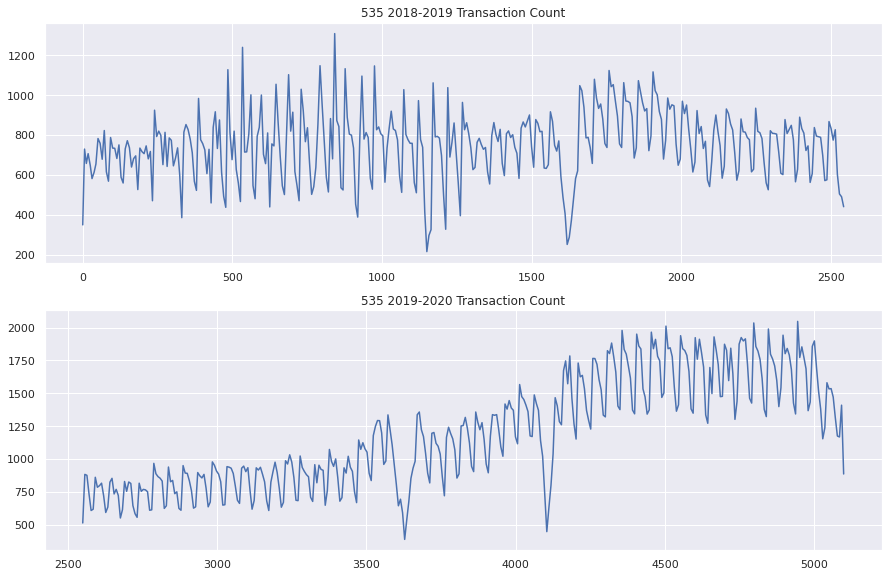

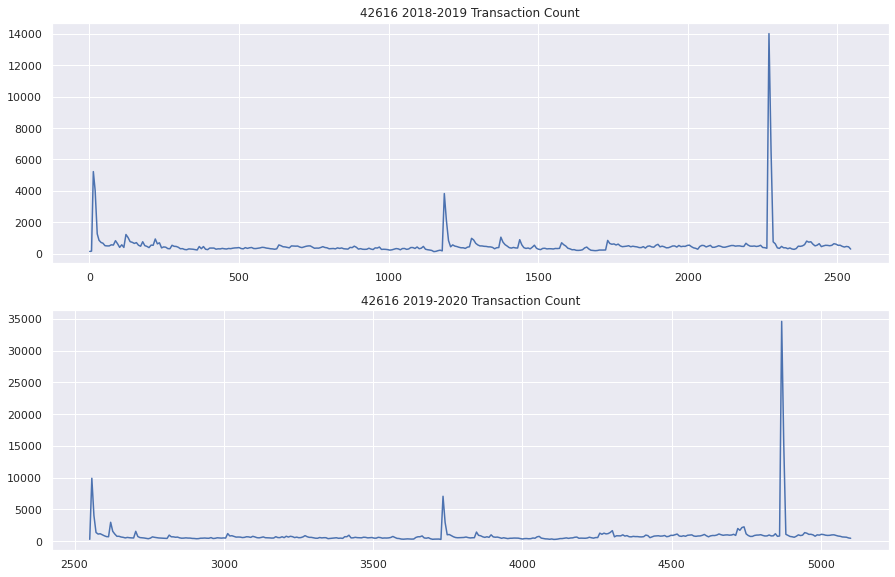

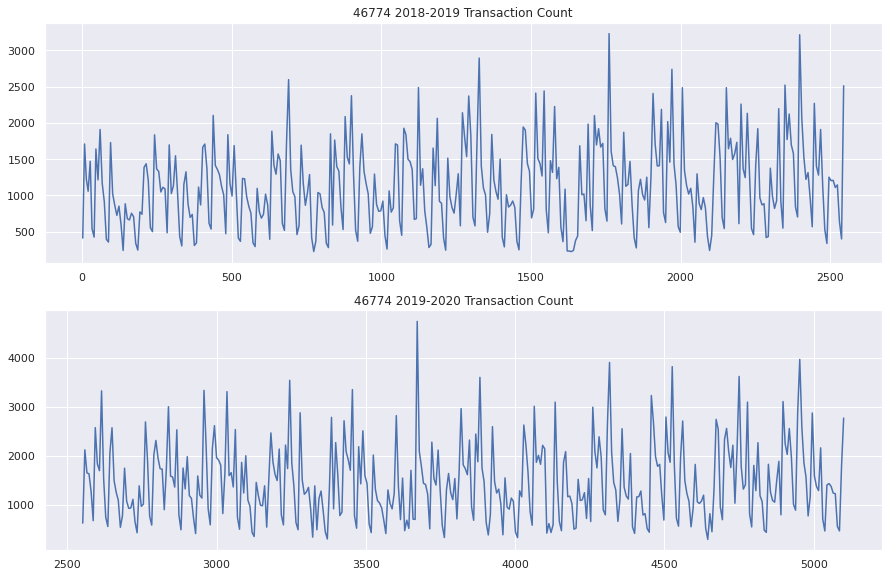

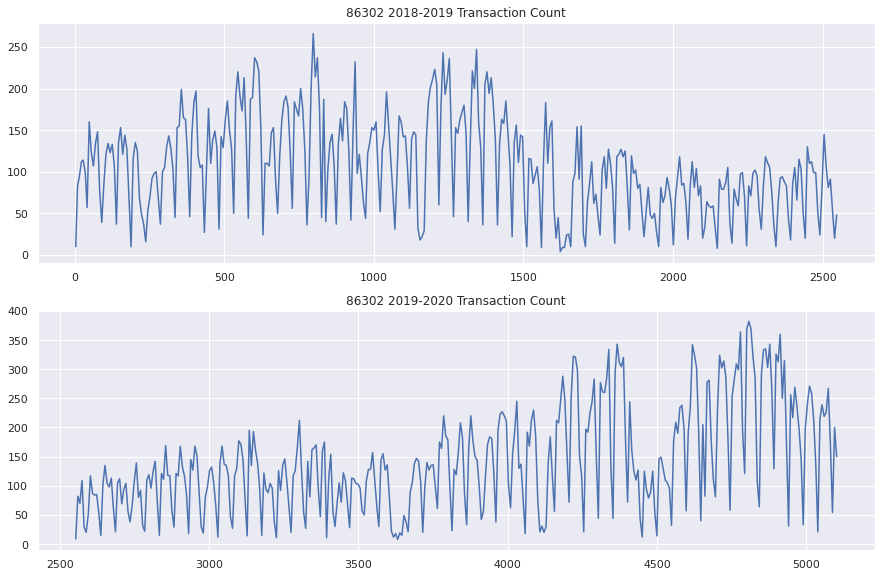

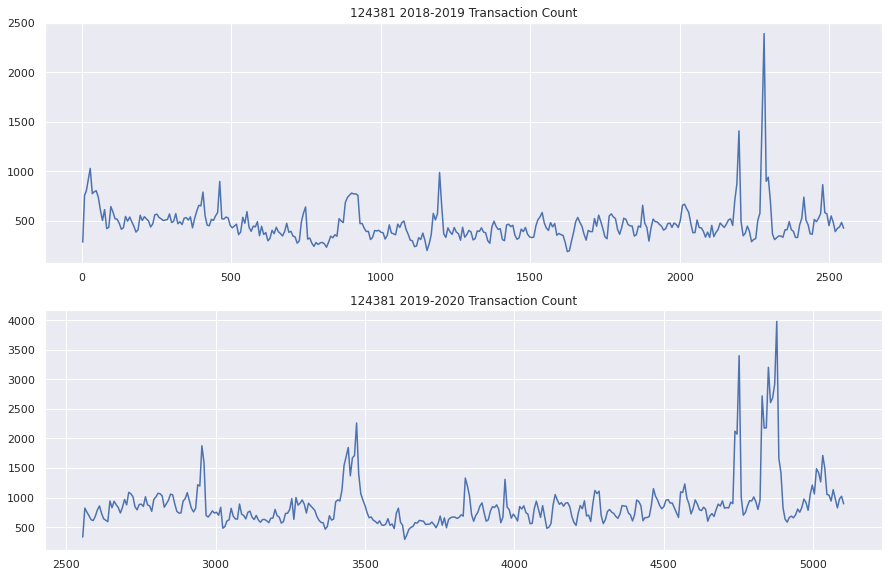

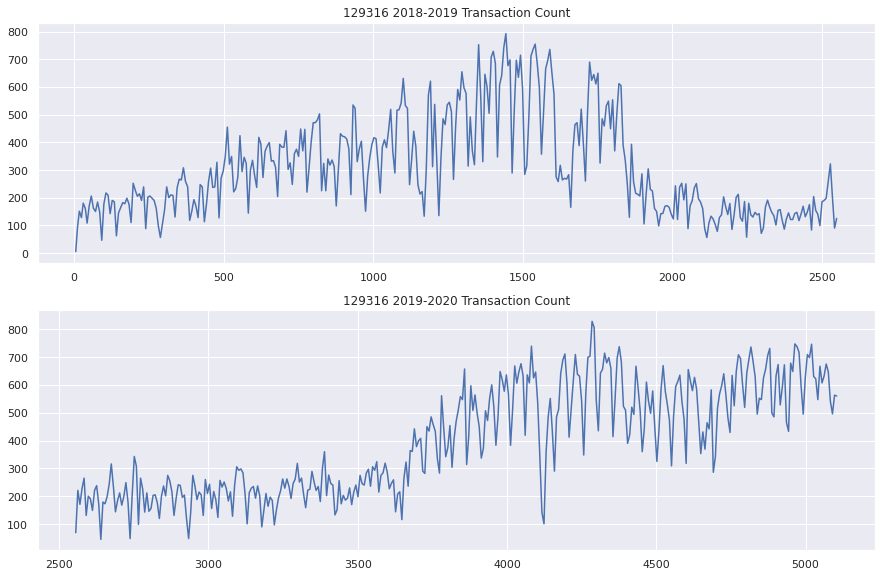

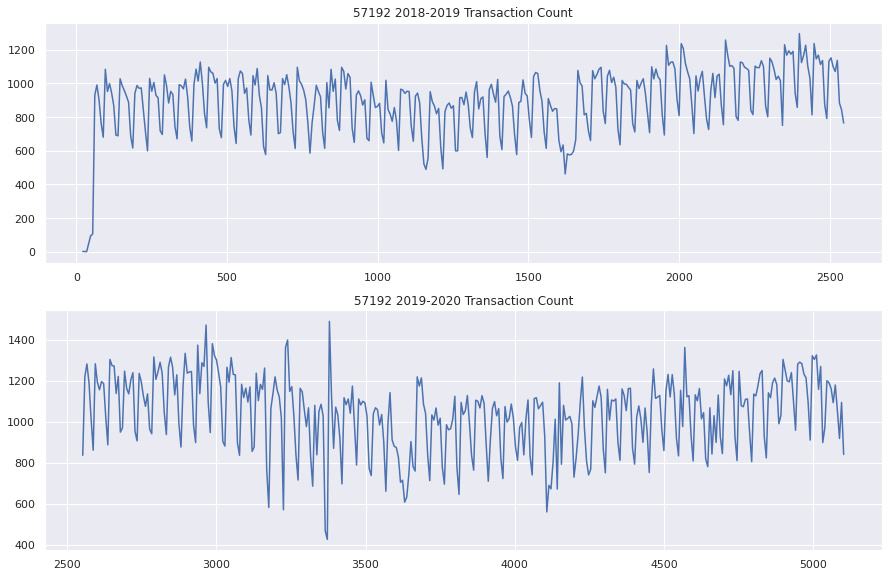

In [ ]:
# üye iş yerlerinin her bir yıl içerisindeki transaction count grafikleri

for id in df.merchant_id.unique():
    plt.figure(figsize=(15, 15))
    plt.subplot(3, 1, 1, title = str(id) + ' 2018-2019 Transaction Count')
    df[(df.merchant_id == id) &( df.transaction_date >= "2018-01-01" )& (df.transaction_date < "2019-01-01")]["Total_Transaction"].plot()
    plt.xlabel('')
    plt.subplot(3, 1, 2,title = str(id) + ' 2019-2020 Transaction Count')
    df[(df.merchant_id == id) &( df.transaction_date >= "2019-01-01" )& (df.transaction_date < "2020-01-01")]["Total_Transaction"].plot()
    plt.xlabel('')
    plt.show()

**Görev 2 :** Feature Engineering tekniklerini uygulayanız. Yeni feature'lar türetiniz.



*   Date Features
*   Lag/Shifted Features
*   Rolling Mean Features
*   Exponentially Weighted Mean Features
*   Özel günler, döviz kuru vb.

In [ ]:
df.head()

,transaction_date,merchant_id,Total_Transaction,Total_Paid,year
0,2018-01-01,535,349,25883.226,2018
1,2018-01-01,42616,141,40918.860,2018
2,2018-01-01,46774,410,306902.700,2018
3,2018-01-01,86302,10,11.340,2018
4,2018-01-01,124381,285,111383.766,2018


In [ ]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

##################### Shape #####################
(7667, 5)
##################### Types #####################
transaction_date     datetime64[ns]
merchant_id                   int64
Total_Transaction             int64
Total_Paid                  float64
year                          int64
dtype: object
##################### Head #####################
  transaction_date  merchant_id  Total_Transaction  Total_Paid  year
0       2018-01-01          535                349   25883.226  2018
1       2018-01-01        42616                141   40918.860  2018
2       2018-01-01        46774                410  306902.700  2018
3       2018-01-01        86302                 10      11.340  2018
4       2018-01-01       124381                285  111383.766  2018
##################### Tail #####################
     transaction_date  merchant_id  Total_Transaction   Total_Paid  year
7662       2020-12-31        46774               3394  3174751.332  2020
7663       2020-12-31        57192    

In [ ]:
def create_date_features(df):
    df['month'] = df.date.dt.month
    df['day_of_month'] = df.date.dt.day
    df['day_of_year'] = df.date.dt.dayofyear
    df['week_of_year'] = df.date.dt.weekofyear
    df['day_of_week'] = df.date.dt.dayofweek
    df['year'] = df.date.dt.year
    df["is_wknd"] = df.date.dt.weekday // 4
    df['is_month_start'] = df.date.dt.is_month_start.astype(int)
    df['is_month_end'] = df.date.dt.is_month_end.astype(int)
    return df

In [ ]:
# def create_date_features(df, date_column):
#    df['month'] = df[date_column].dt.month
#    df['day_of_month'] = df[date_column].dt.day
#    df['day_of_year'] = df[date_column].dt.dayofyear
#    df['week_of_year'] = df[date_column].dt.weekofyear
#    df['day_of_week'] = df[date_column].dt.dayofweek
#    df['year'] = df[date_column].dt.year
#    df["is_wknd"] = df[date_column].dt.weekday // 4
#    df['is_month_start'] =df[date_column].dt.is_month_start.astype(int)
#    df['is_month_end'] = df[date_column].dt.is_month_end.astype(int)
#    df['quarter'] = df[date_column].dt.quarter
#    df['is_quarter_start'] = df[date_column].dt.is_quarter_start.astype(int)
#    df['is_quarter_end'] = df[date_column].dt.is_quarter_end.astype(int)
#    df['is_year_start'] = df[date_column].dt.is_year_start.astype(int)
#    df['is_year_end'] = df[date_column].dt.is_year_end.astype(int)
#    return df

In [ ]:
df['transaction_date'].name

'transaction_date'

In [ ]:
df.rename(columns={"transaction_date": "date"}, inplace=True)

In [ ]:
df.head()

,date,merchant_id,Total_Transaction,Total_Paid,year
0,2018-01-01,535,349,25883.226,2018
1,2018-01-01,42616,141,40918.860,2018
2,2018-01-01,46774,410,306902.700,2018
3,2018-01-01,86302,10,11.340,2018
4,2018-01-01,124381,285,111383.766,2018


In [ ]:
create_date_features(df)

,date,merchant_id,Total_Transaction,Total_Paid,year,month,day_of_month,day_of_year,week_of_year,day_of_week,is_wknd,is_month_start,is_month_end
0,2018-01-01,535,349,25883.226,2018,1,1,1,1,0,0,1,0
1,2018-01-01,42616,141,40918.860,2018,1,1,1,1,0,0,1,0
2,2018-01-01,46774,410,306902.700,2018,1,1,1,1,0,0,1,0
3,2018-01-01,86302,10,11.340,2018,1,1,1,1,0,0,1,0
4,2018-01-01,124381,285,111383.766,2018,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7662,2020-12-31,46774,3394,3174751.332,2020,12,31,366,53,3,0,0,1
7663,2020-12-31,57192,856,337696.020,2020,12,31,366,53,3,0,0,1
7664,2020-12-31,86302,2657,10461.006,2020,12,31,366,53,3,0,0,1
7665,2020-12-31,124381,3668,2445655.950,2020,12,31,366,53,3,0,0,1


In [ ]:
def random_noise(dataframe):
    return np.random.normal(scale=1.6, size=(len(dataframe),))

In [ ]:
df.sort_values(by=['merchant_id', 'date'], axis=0, inplace=True)

In [ ]:
def lag_features(dataframe, lags):
    for lag in lags:
        dataframe['sales_lag_' + str(lag)] = dataframe.groupby("merchant_id")['Total_Transaction'].transform(
            lambda x: x.shift(lag)) + random_noise(dataframe)
    return dataframe

In [ ]:
df = lag_features(df, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])

In [ ]:
def roll_mean_features(dataframe, windows):
    for window in windows:
        dataframe['sales_roll_mean_' + str(window)] = dataframe.groupby("merchant_id")['Total_Transaction']. \
                                                          transform(
            lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean()) + random_noise(
            dataframe)
    return dataframe

In [ ]:
df = roll_mean_features(df, [365, 546])

In [ ]:
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['sales_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby("merchant_id")['Total_Transaction'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe

In [ ]:
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags = [91, 98, 105, 112, 180, 270, 365, 546, 728]

In [ ]:
df = ewm_features(df, alphas, lags)
check_df(df)

##################### Shape #####################
(7667, 70)
##################### Types #####################
date                          datetime64[ns]
merchant_id                            int64
Total_Transaction                      int64
Total_Paid                           float64
year                                   int64
                                   ...      
sales_ewm_alpha_05_lag_180           float64
sales_ewm_alpha_05_lag_270           float64
sales_ewm_alpha_05_lag_365           float64
sales_ewm_alpha_05_lag_546           float64
sales_ewm_alpha_05_lag_728           float64
Length: 70, dtype: object
##################### Head #####################
         date  merchant_id  Total_Transaction  Total_Paid  year  month  day_of_month  day_of_year  week_of_year  day_of_week  is_wknd  is_month_start  is_month_end  sales_lag_91  sales_lag_98  sales_lag_105  sales_lag_112  sales_lag_119  sales_lag_126  sales_lag_182  sales_lag_364  sales_lag_546  sales_lag_728  sales_

**Görev 3:** Modellemeye Hazırlık ve Modelleme

**Adım 1:** One-hot encoding yapınız.

In [ ]:
df = pd.get_dummies(df, columns=['merchant_id', 'day_of_week', 'month'])


check_df(df)

##################### Shape #####################
(7667, 93)
##################### Types #####################
date                 datetime64[ns]
Total_Transaction             int64
Total_Paid                  float64
year                          int64
day_of_month                  int64
                          ...      
month_8                       uint8
month_9                       uint8
month_10                      uint8
month_11                      uint8
month_12                      uint8
Length: 93, dtype: object
##################### Head #####################
         date  Total_Transaction  Total_Paid  year  day_of_month  day_of_year  week_of_year  is_wknd  is_month_start  is_month_end  sales_lag_91  sales_lag_98  sales_lag_105  sales_lag_112  sales_lag_119  sales_lag_126  sales_lag_182  sales_lag_364  sales_lag_546  sales_lag_728  sales_roll_mean_365  sales_roll_mean_546  sales_ewm_alpha_095_lag_91  sales_ewm_alpha_095_lag_98  sales_ewm_alpha_095_lag_105  sales_ewm_a

In [ ]:
df['Total_Transaction'] = np.log1p(df["Total_Transaction"].values)

check_df(df)

##################### Shape #####################
(7667, 93)
##################### Types #####################
date                 datetime64[ns]
Total_Transaction           float64
Total_Paid                  float64
year                          int64
day_of_month                  int64
                          ...      
month_8                       uint8
month_9                       uint8
month_10                      uint8
month_11                      uint8
month_12                      uint8
Length: 93, dtype: object
##################### Head #####################
         date  Total_Transaction  Total_Paid  year  day_of_month  day_of_year  week_of_year  is_wknd  is_month_start  is_month_end  sales_lag_91  sales_lag_98  sales_lag_105  sales_lag_112  sales_lag_119  sales_lag_126  sales_lag_182  sales_lag_364  sales_lag_546  sales_lag_728  sales_roll_mean_365  sales_roll_mean_546  sales_ewm_alpha_095_lag_91  sales_ewm_alpha_095_lag_98  sales_ewm_alpha_095_lag_105  sales_ewm_a

**Adım 2:** Custom Cost Function'ları tanımlayınız.

In [ ]:
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val

In [ ]:
def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'SMAPE', smape_val, False

**Adım 3:** Veri setini train ve validation olarak ayırınız.

In [ ]:
# 2020' nin başına kadar (2019'un sonuna kadar) train seti.
train = df.loc[(df["date"] < "2020-01-01"), :]

In [ ]:
# 2020'nin ilk 3'ayı validasyon seti.
val = df.loc[(df["date"] >= "2020-01-01") & (df["date"] < "2020-04-01"), :]

In [ ]:
cols = [col for col in train.columns if col not in ['date', "Total_Transaction", "year"]]

In [ ]:
Y_train = train['Total_Transaction']
X_train = train[cols]

Y_val = val['Total_Transaction']
X_val = val[cols]

Y_train.shape, X_train.shape, Y_val.shape, X_val.shape

((5105,), (5105, 90), (637,), (637, 90))

**Adım 4:** LightGBM Modelini oluşturunuz ve SMAPE ile hata değerini gözlemleyiniz.

In [ ]:
# LightGBM parameters
lgb_params = {'num_leaves': 10,
              'learning_rate': 0.02,
              'feature_fraction': 0.8,
              'max_depth': 5,
              'verbose': 0,
              'num_boost_round': 1000,
              'early_stopping_rounds': 200,
              'nthread': -1}

In [ ]:
lgbtrain = lgb.Dataset(data=X_train, label=Y_train, feature_name=cols)

lgbval = lgb.Dataset(data=X_val, label=Y_val, reference=lgbtrain, feature_name=cols)

model = lgb.train(lgb_params, lgbtrain,
                  valid_sets=[lgbtrain, lgbval],
                  num_boost_round=lgb_params['num_boost_round'],
                  early_stopping_rounds=lgb_params['early_stopping_rounds'],
                  feval=lgbm_smape,
                  verbose_eval=100)

y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)

smape(np.expm1(y_pred_val), np.expm1(Y_val))

Training until validation scores don't improve for 200 rounds.
[100]	training's SMAPE: 19.1093	valid_1's SMAPE: 27.583
[200]	training's SMAPE: 11.8786	valid_1's SMAPE: 18.6868
[300]	training's SMAPE: 9.86027	valid_1's SMAPE: 16.5986
[400]	training's SMAPE: 8.7348	valid_1's SMAPE: 16.2442
[500]	training's SMAPE: 7.9416	valid_1's SMAPE: 16.0646
[600]	training's SMAPE: 7.3843	valid_1's SMAPE: 15.996
[700]	training's SMAPE: 6.98204	valid_1's SMAPE: 15.807
[800]	training's SMAPE: 6.66148	valid_1's SMAPE: 15.5263
[900]	training's SMAPE: 6.39654	valid_1's SMAPE: 15.2358
[1000]	training's SMAPE: 6.18618	valid_1's SMAPE: 15.1395
Did not meet early stopping. Best iteration is:
[1000]	training's SMAPE: 6.18618	valid_1's SMAPE: 15.1395


15.139466521065554